# Geolocating ISCE Products
By: Zack Keskinen, Jack Tarricone, Ross Palomaki, Naheem Adebisi

In [1]:
%matplotlib inline
import sys
import os
import glob
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from uavsar_pytools.georeference import geolocate_uavsar

## Plot Slant Range Unwrapped Phase
ISCE and the unwrapping process (ICU/SNAPHU) produces an interferogram (.int), unwrapped phase (.unw), coherence (.coh), and unwrapping components (.unw.conncomp) in slant range. These products need to be georefernced. 

/Users/jacktarricone/miniconda3/envs/uavsar_pytools/lib/python3.10/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


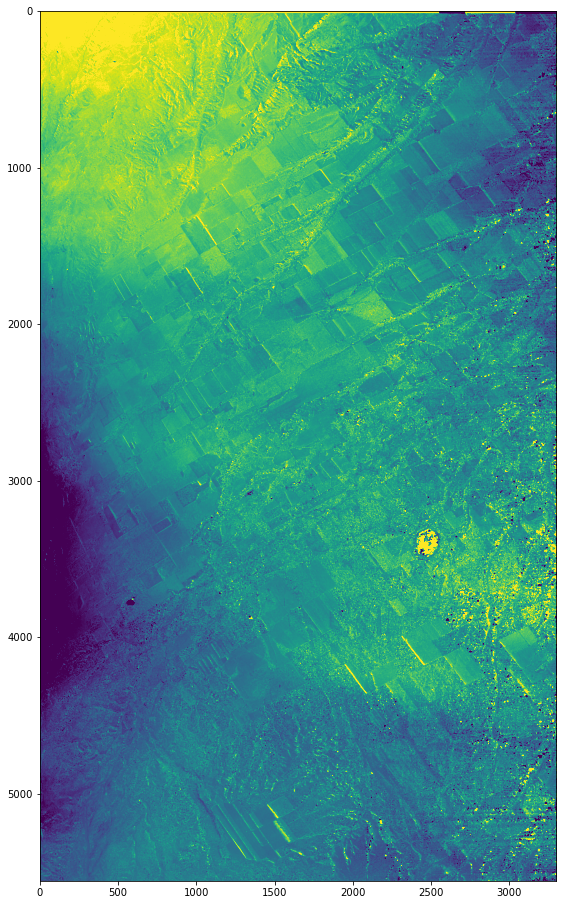

In [2]:
# test plot unw file
with rio.open('/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.unw_snaphu.unw.vrt') as src:
    arr = src.read(2) # read second band of unw files
    
fig = plt.figure(figsize=(18, 16))
plt.imshow(arr, vmin = -2, vmax = 2)

## Geolocate using ```geolocated_uavsar()```
The function has four inputs, which are oulined below. We're using .unw, but it could can used for any ISCE product.

In [4]:
# path to your unw.vrt
in_fp = '/Users/jacktarricone/isce_run/igrams/20210115T1910_20210120T2040/20210115T1910_20210120T2040.unw_snaphu.unw.vrt'

# path to annotation file
ann_fp = '/Users/jacktarricone/isce_run/download/uticam_21003_21002_003_210115_L090HH_01_BC.ann'

# where the .tif is being save
out_dir = '/Users/jacktarricone/isce_run/download/'

# path to lat/lon/height file
llh_fp = '/Users/jacktarricone/isce_run/download/uticam_21003_01_BC_s1_2x8.llh'

In [5]:
# run geolocate function
geolocated_data = geolocate_uavsar(in_fp = in_fp, ann_fp = ann_fp, out_dir = out_dir, llh_fp = llh_fp)
print(geolocated_data[0])

ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 0,0,2232,1883, skipping.
ERROR 1: Too many points (529 out of 529) failed to transform, unable to compute output bounds.
Warning 1: Unable to compute source region for output window 6696,5649,2233,1883, skipping.


Ignore the error message: Unable to compute bounds. It is related
                to the pixels created by the conversion along the edge of topography.
                Error message is known and should not be an issue.
/Users/jacktarricone/isce_run/download/20210115T1910_20210120T2040.unw_snaphu.unw.tif.unw.tif


## Plot geolocated unwrapped phase data!

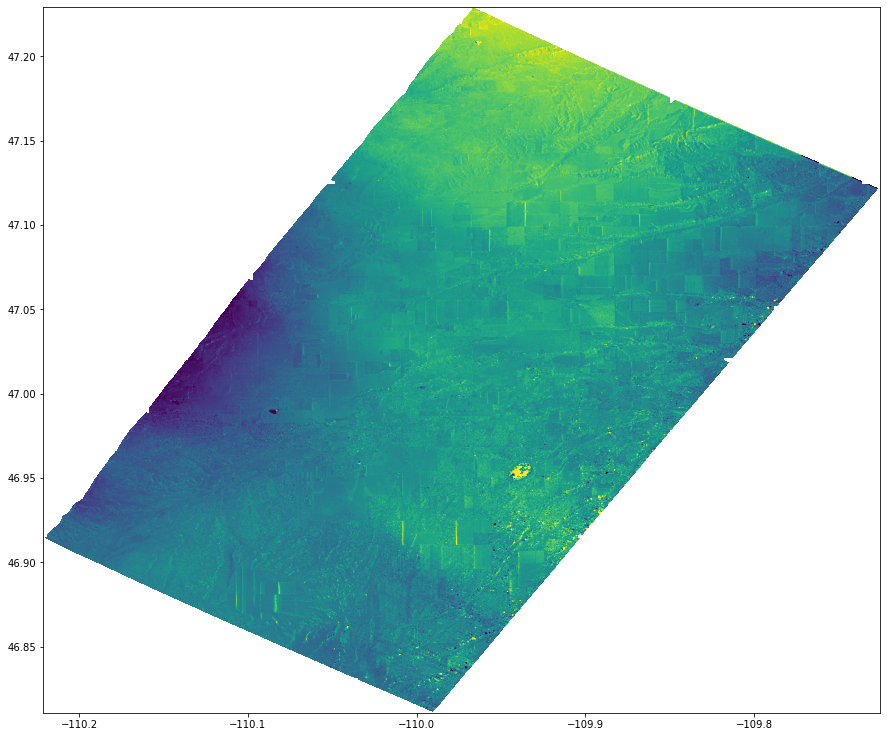

In [8]:
with rio.open(geolocated_data[0]) as src:
    plt.subplots(1, figsize=(15, 15))
    show(src, vmin = -3, vmax = 3) # read second band of unw files